In [1]:
import os
import glob # Adds wildcard-support for file exploration
import numpy as np
import matplotlib.pyplot as plt

# Load functions from file "utils.py"
import utils

### Load bizeps dataset

In [2]:
data_path = os.path.join("..", "data", "bizeps")
gyro_data_files = glob.glob(os.path.join(data_path,"gyro_sensor_data_*.txt"))
accel_data_files = glob.glob(os.path.join(data_path,"accel_sensor_data_*.txt"))

print(*gyro_data_files, sep="\n")
print("\n")
print(*accel_data_files, sep="\n")

../data/bizeps/gyro_sensor_data_Thu_Apr_01_17_03_53_GMT+02_00_2021.txt
../data/bizeps/gyro_sensor_data_Wed_Apr_07_12_48_26_GMT+02_00_2021.txt
../data/bizeps/gyro_sensor_data_Wed_Apr_07_12_49_31_GMT+02_00_2021.txt
../data/bizeps/gyro_sensor_data_Wed_Apr_07_12_50_38_GMT+02_00_2021.txt


../data/bizeps/accel_sensor_data_Thu Apr_01_17_03_53_GMT+02_00_2021.txt
../data/bizeps/accel_sensor_data_Wed_Apr_07_12_48_26_GMT+02_00_2021.txt
../data/bizeps/accel_sensor_data_Wed_Apr_07_12_49_31_GMT+02_00_2021.txt
../data/bizeps/accel_sensor_data_Wed_Apr_07_12_50_38_GMT+02_00_2021.txt


In [3]:
gyro_data_file = gyro_data_files[3]
accel_data_file = accel_data_files[3]
gyro_data = np.loadtxt(gyro_data_file, delimiter=";")
accel_data = np.loadtxt(accel_data_file, delimiter=";")

### Interpolate and resample
The data from the sensors is not captured at a uniform sampling rate. Using linear interpolation, a sampling-rate of $100\ \text{Hz}$ is applied.

In [4]:
t_gyro_new, gyro_data_new = utils.resample_3d_timeseries(t=gyro_data[:,0], y=gyro_data[:,1:], f_resample=100.0)
t_accel_new , accel_data_new = utils.resample_3d_timeseries(t=accel_data[:,0], y=accel_data[:,1:], f_resample=100.0)

# Crop both data arrays to the same length.
if t_gyro_new[-1] < t_accel_new[-1]:
    T_max = t_gyro_new[-1]
    idx = t_accel_new <= T_max
    t_accel_new = t_accel_new[idx]
    accel_data_new = accel_data_new[idx,:]
else:
    T_max = t_accel_new[-1]
    idx = t_gyro_new <= T_max
    t_gyro_new = t_gyro_new[idx]
    gyro_data_new = gyro_data_new[idx,:]

# Check both lengths are now really the same.
assert len(t_gyro_new) == len(t_accel_new)

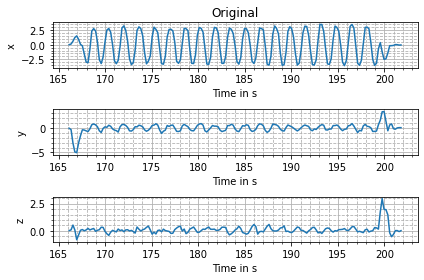

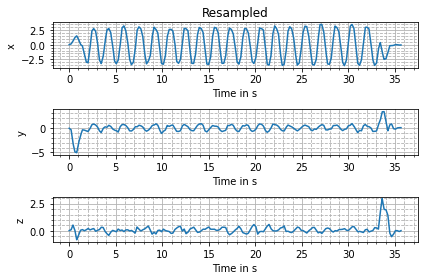

In [5]:
_ = utils.plot_sensor_data(gyro_data, title="Original", ylabels=("x", "y", "z"))
_ = utils.plot_sensor_data(np.column_stack((t_gyro_new, gyro_data_new)), title="Resampled", ylabels=("x", "y", "z"))